<center><h1>Quelques représentation de données<\h1>
</center>
<hr> 
    
# Iris de Fisher
    
## Bibliothèques Python

In [108]:
import numpy as np  # manipulation efficace vecteur matrice
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

## import des données (Iris de Fisher)

In [109]:
table = pd.read_csv('iris.csv');print(table)
T=np.array(table) #
Data = np.array(T[:,0:4],dtype=float) # seulement les valeurs numérique des 4 colonnes
classes = np.unique(T[:,4]); print(classes)# récupération des nom des classes 

     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Bibliothèque Pyplot (multiplot)

Pour plus d'exemples : https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

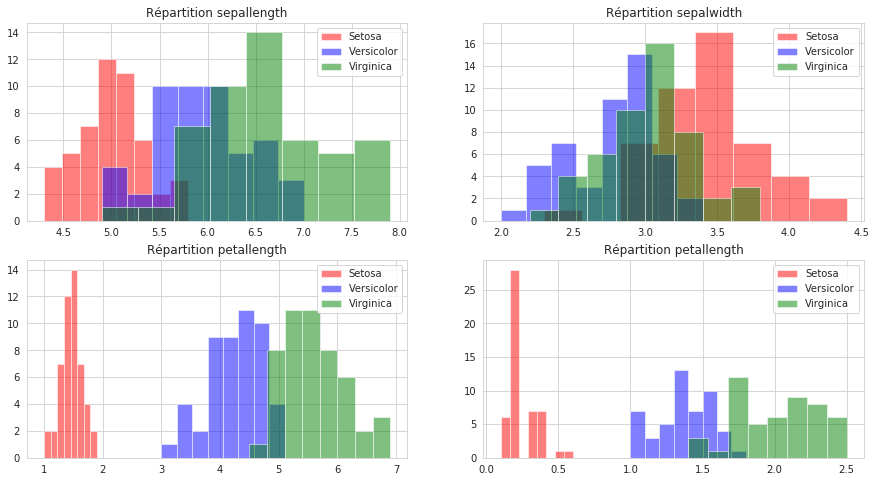

In [110]:
fig, ((ax1, ax2), (ax3, ax4))  = pyplot.subplots(2,2)
fig.set_size_inches(15, 8)


ax1.set_title('Répartition sepallength')
ax1.hist(Data[T[:,4] == classes[0],0], bins=8, color='red', label='Setosa', alpha=0.5) 
ax1.hist(Data[T[:,4] == classes[1],0], bins=8, color='blue', label='Versicolor', alpha=0.5) 
ax1.hist(Data[T[:,4] == classes[2],0], bins=8, color='green', label='Virginica', alpha=0.5) 
ax1.legend()

ax2.set_title('Répartition sepalwidth')
ax2.hist(Data[T[:,4] == classes[0],1], bins=8, color='red', label='Setosa', alpha=0.5) 
ax2.hist(Data[T[:,4] == classes[1],1], bins=8, color='blue', label='Versicolor', alpha=0.5) 
ax2.hist(Data[T[:,4] == classes[2],1], bins=8, color='green', label='Virginica', alpha=0.5) 
ax2.legend()

ax3.set_title('Répartition petallength')
ax3.hist(Data[T[:,4] == classes[0],2], bins=8, color='red', label='Setosa', alpha=0.5) 
ax3.hist(Data[T[:,4] == classes[1],2], bins=8, color='blue', label='Versicolor', alpha=0.5) 
ax3.hist(Data[T[:,4] == classes[2],2], bins=8, color='green', label='Virginica', alpha=0.5) 
ax3.legend()

ax4.set_title('Répartition petallength')
ax4.hist(Data[T[:,4] == classes[0],3], bins=8, color='red', label='Setosa', alpha=0.5) 
ax4.hist(Data[T[:,4] == classes[1],3], bins=8, color='blue', label='Versicolor', alpha=0.5) 
ax4.hist(Data[T[:,4] == classes[2],3], bins=8, color='green', label='Virginica', alpha=0.5) 
ax4.legend()

## Bibliothèque Seaborn (pyplot)

In [111]:
import seaborn as sns

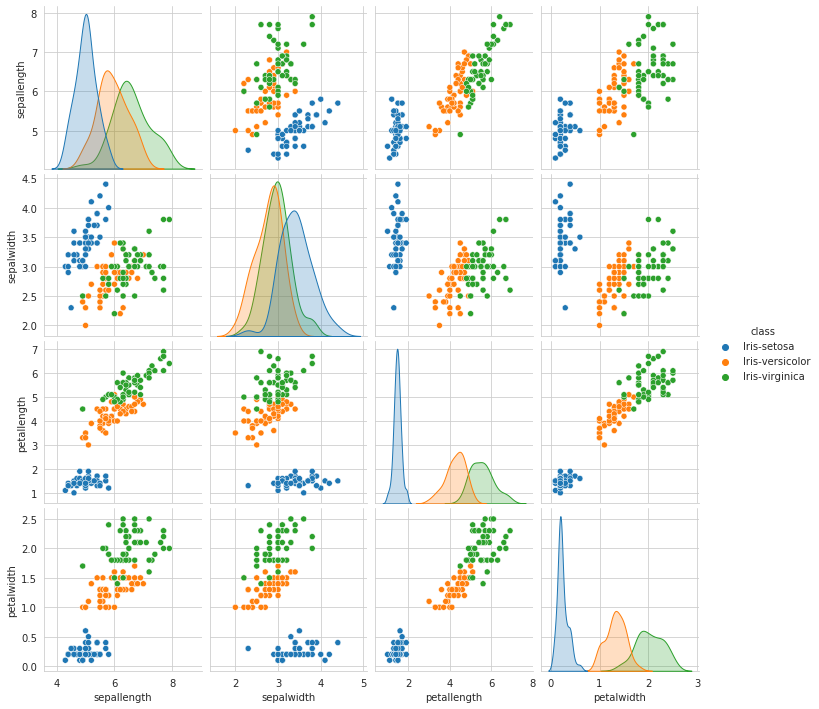

In [112]:
sns.set_style("whitegrid")
sns.pairplot(table,hue="class");
pyplot.show()

## PCA Analyse en composante pricipales

In [113]:
from sklearn.decomposition import PCA
# Définition de l'hyperparamètre du nombre de composantes voulues
model = PCA(n_components=3)

In [114]:
# Alimentation du modèle
model.fit(Data)

PCA(n_components=3)

In [115]:
# Transformation avec ses propres données
reduc = model.transform(Data )

In [116]:
table['PCA1'] = reduc[:, 0]
table['PCA2'] = reduc[:, 1]
table['PCA3'] = reduc[:, 2]

classes = np.unique(table['class']); print(classes)# récupération des nom des classes 
target = np.ones(150)
for i in range(3):
    idx=np.where(table['class'] == classes[i])
    target[idx]=int(i)
table['target'] = target
table.target = table.target.astype(int)

table.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepallength,sepalwidth,petallength,petalwidth,class,PCA1,PCA2,PCA3,target
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607,-0.021512,0
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557,-0.203521,0
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346,0.024709,0
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124,0.037672,0
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925,0.096230,0


No handles with labels found to put in legend.


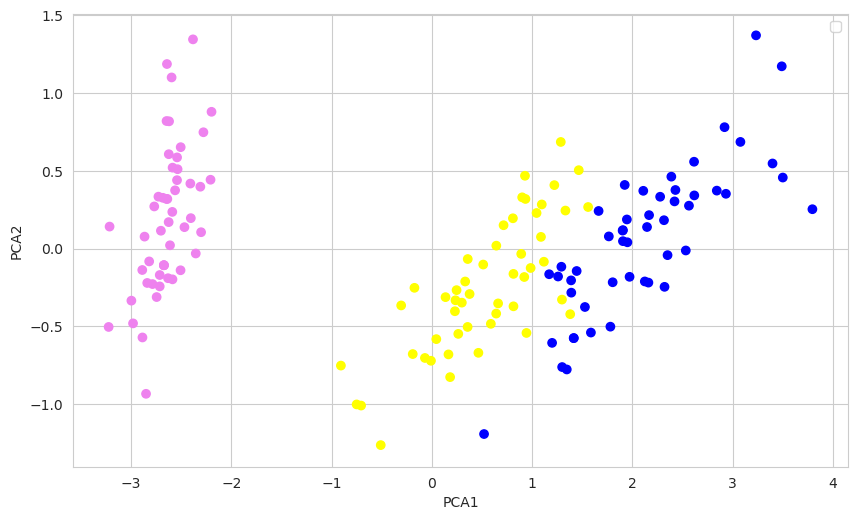

In [117]:
colors = ['violet', 'yellow', 'blue']
fig = pyplot.figure(figsize=(10,6), dpi= 100)
pyplot.scatter(table['PCA1'], table['PCA2'],c= [ colors[c] for c in table['target'] ]);
pyplot.xlabel('PCA1')
pyplot.ylabel('PCA2');
pyplot.legend()

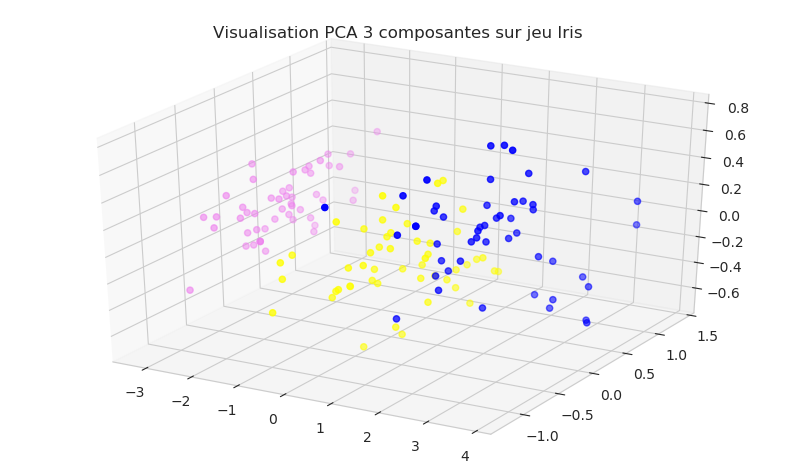

In [129]:
fig = pyplot.figure(figsize=(10,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Visualisation PCA 3 composantes sur jeu Iris')
#ax.axis('off')
m=['o','^','+']
c=['r','b','g']
ax.scatter(table['PCA1'], table['PCA2'],table['PCA3'],c= [ colors[c] for c in table['target'] ])

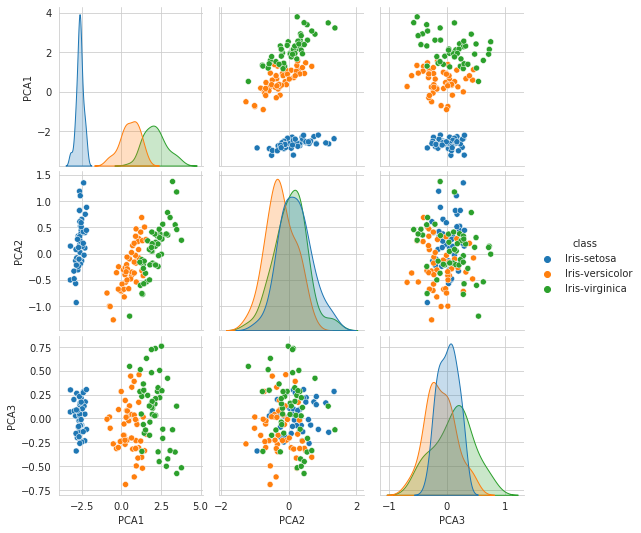

In [147]:
sns.set_style("whitegrid")
sns.pairplot(table[['PCA1','PCA2','PCA3','class']],hue="class");
pyplot.show()


In [145]:
table[['PCA1','PCA2','PCA3','class']]

,PCA1,PCA2,PCA3,class
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


In [127]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [126]:
fig = px.scatter_3d(table, x='PCA1', y='PCA2', z='PCA3',
              color='class')
fig.show()

In [128]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)